In [4]:
#colab Google Drive와 연동
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [21]:
# colab notebook content folder에서 Tar파일 불러오기

!ls /content/gdrive/'MyDrive'/'Colab Notebooks'/ -la
!cp /content/gdrive/'MyDrive'/'Colab Notebooks'/images.tar.gz .

total 1085620
-rw------- 1 root root 1111530564 Dec  8 07:20 images.tar.gz
-rw------- 1 root root     143394 Dec 15 08:46 Untitled0.ipynb


In [22]:
#해당 tar 파일 압축풀기
!tar -xvzf images.tar.gz

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
images/food16448.jpg
images/interior1131.jpg
images/food17756.jpg
images/interior6886.jpg
images/food18465.jpg
images/interior13003.jpg
images/interior7540.jpg
images/exterior2926.jpg
images/food10039.jpg
images/interior8673.jpg
images/food13530.jpg
images/exterior7686.jpg
images/interior4049.jpg
images/interior3726.jpg
images/food8296.jpg
images/exterior9873.jpg
images/interior2438.jpg
images/interior11614.jpg
images/food15141.jpg
images/food9188.jpg
images/interior994.jpg
images/exterior6598.jpg
images/interior5357.jpg
images/food12148.jpg
images/interior5431.jpg
images/interior11172.jpg
images/exterior1591.jpg
images/food15627.jpg
images/interior3040.jpg
images/food14539.jpg
images/food13256.jpg
images/food9836.jpg
images/interior7226.jpg
images/interior8115.jpg
images/exterior3386.jpg
images/food17030.jpg
images/food2963.jpg
images/interior13765.jpg
images/food18303.jpg
images/exterior2098.jpg
images/interior1657.jpg
images/food10987.jpg
images/i

In [23]:
#image directory 안에 food, interior, exterior subdirectory 생성
!cd images; mkdir food; mkdir interior; mkdir exterior

mkdir: cannot create directory ‘food’: File exists
mkdir: cannot create directory ‘interior’: File exists
mkdir: cannot create directory ‘exterior’: File exists


In [24]:
#같은 이름을 가진 파일들을 같은 이름을 가진 폴더에 move
!cd images; ls |  ls | grep -e food | xargs mv -t food
!cd images; ls |  ls | grep -e interior | xargs mv -t interior
!cd images; ls |  ls | grep -e exterior | xargs mv -t exterior


mv: cannot move 'food' to a subdirectory of itself, 'food/food'
mv: cannot move 'interior' to a subdirectory of itself, 'interior/interior'
mv: cannot move 'exterior' to a subdirectory of itself, 'exterior/exterior'


In [25]:
# Tensorflow의 GPU 메모리 할당 문제를 해결해주는 코드(Tensorflow >= 2.0.0)
import tensorflow as tf

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)


In [26]:
#tensorflow version 확인
tf.__version__

'2.3.0'

In [27]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D,Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
import cv2
import os


#keras NN으로 model을 생성하는 함수 작성
def gen_sequential_model():
    model = Sequential([Input(shape = (300, 300, 3), name = 'input_layer'), 
                        Rescaling(1.0/255),
                        Conv2D(32, kernel_size = 3,  padding = "same", activation = 'relu', name = 'conv_layer1'),
                        BatchNormalization(),
                        MaxPooling2D(pool_size = 2),
                        Dropout(0.4),
                        Flatten(),
                        Dense(3, activation = 'softmax', name = 'output_layer')])
    
    model.summary()
    
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model


In [28]:
#!cd images 이후,image directory 내의 이미지들에 접근하여 generator 생성하여 train data와 valid data로 나눔
def train_test_split_by_idg():

  image_dir = './images/'
  classes = ['food', 'interior', 'exterior']
  generator = ImageDataGenerator(validation_split = 0.2)
  train_data = generator.flow_from_directory(image_dir, target_size = (300,300), classes = classes, batch_size = 32, class_mode = 'categorical', subset = 'training', shuffle = True)
  test_data = generator.flow_from_directory(image_dir, target_size = (300,300), classes = classes, batch_size = 32, class_mode = 'categorical', subset = 'validation', shuffle = True)
  
  #data shape 확인
  x_batch, y_batch = next(train_data)
  print(x_batch.shape)
  print(y_batch.shape)

  #사진 확인
  import matplotlib.pyplot as plt
  %matplotlib inline
  plt.imshow(np.uint8(x_batch[0]))
  for i in range(len(classes)):
    if y_batch[0][i] == 1:
        plt.title(classes[i])

  return train_data, test_data


In [ ]:
#sample data 추출 및 train data, test data split 함수로 하려다가 메모리 문제로 실패..
'''def performance_train_test_split():
    X = []
    y = []

    from sklearn.model_selection import train_test_split
    
    image_dir = './images/'
    classes = ['food', 'interior', 'exterior']
    
    for image_name in os.listdir(image_dir):
        X.append(cv2.imread(os.path.join(image_dir, image_name),cv2.COLOR_BGR2RGB)) 
    
        for idx in range(len(classes)):
            if image_name.startswith(classes[idx]): 
                y.append(idx)
            
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    
    #one-hot encoding
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    print(X_train.shape)
    print(y_train.shape)

    X_test = np.array(X_test)
    y_test = np.array(y_test)
    print(X_test.shape)
    print(y_test.shape)
    
    return X_train, X_test, y_train, y_test
    '''

"def performance_train_test_split():\n    X = []\n    y = []\n\n    from sklearn.model_selection import train_test_split\n    \n    image_dir = './images/'\n    classes = ['food', 'interior', 'exterior']\n    \n    for image_name in os.listdir(image_dir):\n        X.append(cv2.imread(os.path.join(image_dir, image_name),cv2.COLOR_BGR2RGB)) \n    \n        for idx in range(len(classes)):\n            if image_name.startswith(classes[idx]): \n                y.append(idx)\n            \n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)\n    \n    #one-hot encoding\n    y_train = to_categorical(y_train)\n    y_test = to_categorical(y_test)\n\n    X_train = np.array(X_train)\n    y_train = np.array(y_train)\n    print(X_train.shape)\n    print(y_train.shape)\n\n    X_test = np.array(X_test)\n    y_test = np.array(y_test)\n    print(X_test.shape)\n    print(y_test.shape)\n    \n    return X_train, X_test, y_train, y_test\n    "

In [29]:
#model로 학습
def fit_model(model, train_data, test_data):
    return model.fit(train_data, validation_data = test_data, epochs = 15, workers = 0, use_multiprocessing = True, verbose = 1)


In [30]:
#plot 그리기
def plot_loss_curve(history):

    import matplotlib.pyplot as plt

    plt.figure(figsize=(15, 10))

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

In [31]:
def plot_prediction_curve(test_image,y_actual, actual_class, y_pred, y_pred_idx):
    classes = ['food', 'interior', 'exterior']
    print("y_actual = ", y_actual)        
    print("actual class : ", actual_class)
    print("y_pred = ", y_pred)
    print("predicted class : ", classes[y_pred_idx])

    import matplotlib.pyplot as plt
    plt.subplot(1,2,1)
    plt.imshow(np.uint8(test_image))
    plt.subplot(1,2,2)
    plt.xlabel('probability')
    plt.ylabel('classes')
    plt.barh(classes, y_pred[0])
    plt.tight_layout()
    plt.show()

In [47]:
#predict하여 false example 2개, true example 2개 추출
def predict_image_sample(model, test_data):
    classes = ['food', 'interior', 'exterior']
    false_count = 0
    true_count = 0
    for batch_num in range(4):
      x_batch, y_batch = test_data.next()
      for test_sample_id in range(32):
        test_image = x_batch[test_sample_id]
        y_actual = y_batch[test_sample_id]

        for i in range(len(classes)):
            if y_actual[i] == 1:
              actual_class = classes[i]

        test_image_res = test_image.reshape(1,300,300,3)
        y_pred = model.predict(test_image_res)
        y_pred_idx = np.argmax(y_pred, axis=1)[0]
        
        if classes[y_pred_idx]!= actual_class and false_count < 2:
          print("<false sample>")
          plot_prediction_curve(test_image,y_actual,actual_class, y_pred, y_pred_idx)
          false_count+=1
        
        elif classes[y_pred_idx]== actual_class and true_count < 2:
          print("<true sample>")
          plot_prediction_curve(test_image,y_actual,actual_class, y_pred, y_pred_idx)
          true_count+=1
        
        if true_count >= 2 and false_count >= 2:
          break

Found 36000 images belonging to 3 classes.
Found 9000 images belonging to 3 classes.
(32, 300, 300, 3)
(32, 3)


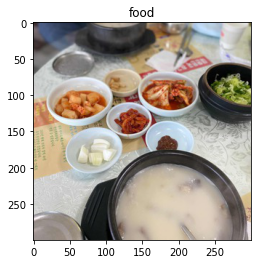

In [33]:
train_data, test_data = train_test_split_by_idg()

Found 36000 images belonging to 3 classes.
Found 9000 images belonging to 3 classes.
(32, 300, 300, 3)
(32, 3)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 300, 300, 3)       0         
_________________________________________________________________
conv_layer1 (Conv2D)         (None, 300, 300, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 300, 300, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 150, 150, 32)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 720000)            0         
_________

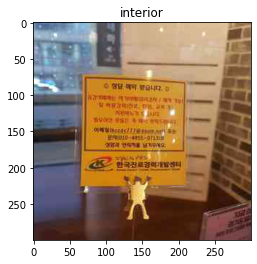

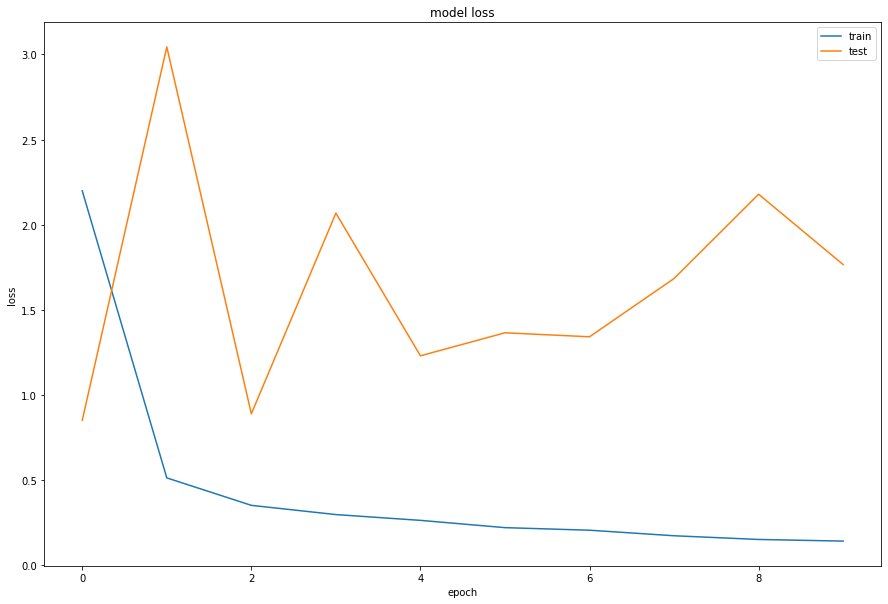

{'loss': [2.1994001865386963, 0.5141568779945374, 0.35293811559677124, 0.29875990748405457, 0.26480141282081604, 0.22205473482608795, 0.20699560642242432, 0.17442412674427032, 0.15269608795642853, 0.14312587678432465], 'accuracy': [0.6571944355964661, 0.7990833520889282, 0.8689166903495789, 0.8933610916137695, 0.9081110954284668, 0.9247499704360962, 0.9319999814033508, 0.9445833563804626, 0.9533055424690247, 0.9562777876853943], 'val_loss': [0.8519992232322693, 3.044210433959961, 0.8903663158416748, 2.068343162536621, 1.230813980102539, 1.3659542798995972, 1.3425073623657227, 1.6845805644989014, 2.179335117340088, 1.766367793083191], 'val_accuracy': [0.6334444284439087, 0.3757777810096741, 0.6980000138282776, 0.5132222175598145, 0.7011111378669739, 0.683222234249115, 0.6918888688087463, 0.6966666579246521, 0.6186666488647461, 0.7127777934074402]}
train loss =  0.14312587678432465
validation loss =  1.766367793083191


In [ ]:
#main1()
model = gen_sequential_model()
history = fit_model(model, train_data, test_data)
plot_loss_curve(history.history)
print(history.history)
print("train loss = ", history.history['loss'][-1])
print("validation loss = ", history.history['val_loss'][-1])




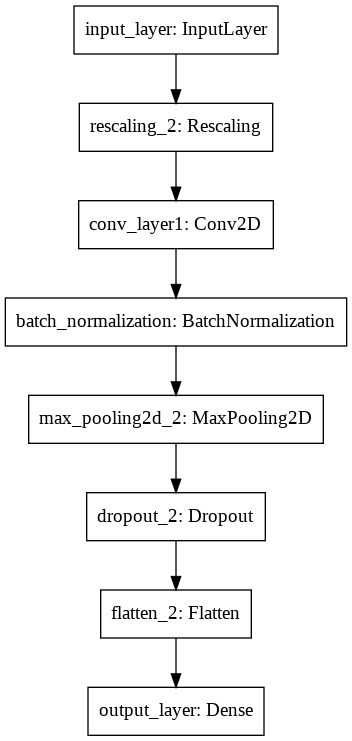

In [ ]:
plot_model(model)

In [ ]:
#keras NN으로 model2를 생성하는 함수 작성
def gen_sequential_model2():
    model = Sequential([Input(shape = (300, 300, 3), name = 'input_layer'), 
                        Rescaling(1.0/255),
                        Conv2D(64, kernel_size = 3,  padding = "same", activation = 'relu', name = 'conv_layer1'),
                        Conv2D(128, kernel_size = 3,  padding = "same", activation = 'relu', name = 'conv_layer2'),
                        BatchNormalization(),
                        MaxPooling2D(pool_size = 2),
                        Dropout(0.2),
                        Flatten(),
                        Dense(3, activation = 'softmax', name = 'output_layer')])
    
    model.summary()
    
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 300, 300, 3)       0         
_________________________________________________________________
conv_layer1 (Conv2D)         (None, 300, 300, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 300, 300, 64)      256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 150, 150, 64)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 150, 150, 64)      0         
_________________________________________________________________
conv_layer2 (Conv2D)         (None, 150, 150, 128)     73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 150, 150, 128)    

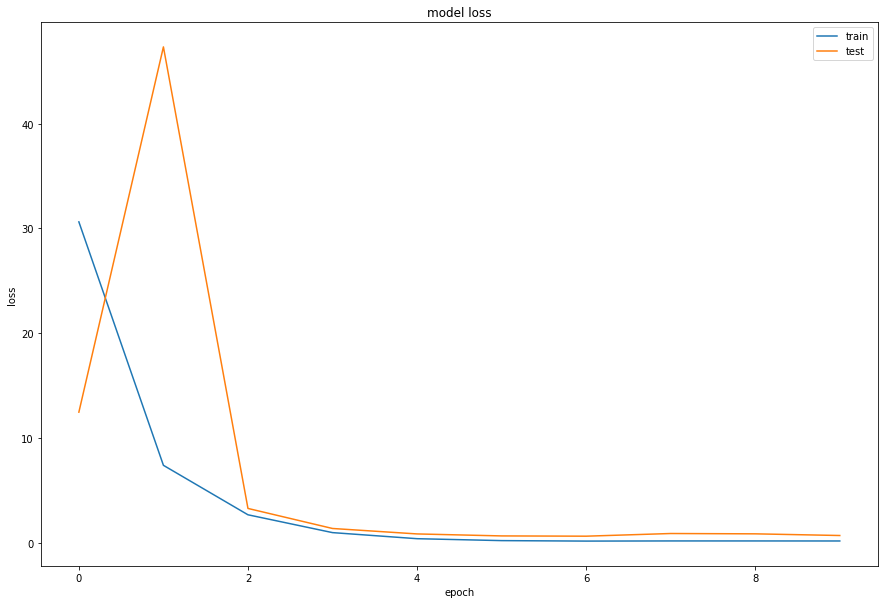

{'loss': [30.623170852661133, 7.398942470550537, 2.6796021461486816, 0.9786397814750671, 0.3988114893436432, 0.21522356569766998, 0.17012900114059448, 0.18459048867225647, 0.18401649594306946, 0.18067589402198792], 'accuracy': [0.671833336353302, 0.7911388874053955, 0.8413333296775818, 0.878333330154419, 0.9055277705192566, 0.9248611330986023, 0.9371389150619507, 0.9326111078262329, 0.9314166903495789, 0.9349722266197205], 'val_loss': [12.470724105834961, 47.315460205078125, 3.285243034362793, 1.3731532096862793, 0.8533704280853271, 0.6636022925376892, 0.6382490992546082, 0.8931729197502136, 0.8619862198829651, 0.7028273344039917], 'val_accuracy': [0.7498888969421387, 0.3902222216129303, 0.7101110816001892, 0.8046666383743286, 0.8235555291175842, 0.8121111392974854, 0.8222222328186035, 0.7788888812065125, 0.7607777714729309, 0.8108888864517212]}
train loss =  0.18067589402198792
validation loss =  0.7028273344039917


In [ ]:
#main2()
model2 = gen_sequential_model2()
history = fit_model(model2, train_data, test_data)
plot_loss_curve(history.history)
print(history.history)
print("train loss = ", history.history['loss'][-1])
print("validation loss = ", history.history['val_loss'][-1])


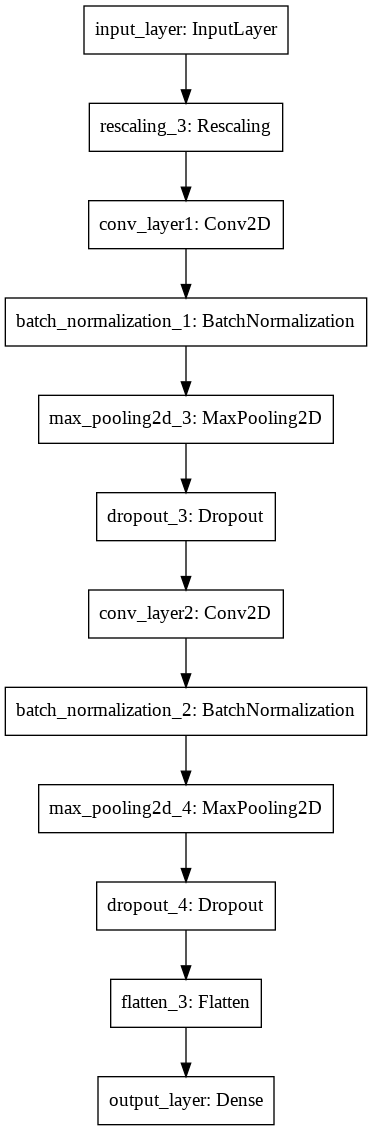

In [ ]:
plot_model(model2)

In [ ]:
#keras NN으로 model3을 생성하는 함수 작성
def gen_sequential_model3():
    model = Sequential([Input(shape = (300, 300, 3), name = 'input_layer'), 
                        Rescaling(1.0/255),
                        Conv2D(64, kernel_size = 3,  padding = "same", activation = 'relu', name = 'conv_layer1'),
                        BatchNormalization(),
                        MaxPooling2D(pool_size = 2),
                        Dropout(0.2),
                        Conv2D(128, kernel_size = 3,  padding = "same", activation = 'relu', name = 'conv_layer2'),
                        Conv2D(256, kernel_size = 3,  padding = "same", activation = 'relu', name = 'conv_layer3'),
                        BatchNormalization(),
                        MaxPooling2D(pool_size = 2),
                        Dropout(0.4),
                        Flatten(),
                        Dense(3, activation = 'softmax', name = 'output_layer')])
    
    model.summary()
    
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
#main3()
model3 = gen_sequential_model3()
history = fit_model(model3, train_data, test_data)
plot_loss_curve(history.history)
print(history.history)
print("train loss = ", history.history['loss'][-1])
print("validation loss = ", history.history['val_loss'][-1])

In [ ]:
plot_model(model3)

In [ ]:
#keras NN으로 model3_1을 생성하는 함수 작성
def gen_sequential_model3_1():
    model = Sequential([Input(shape = (300, 300, 3), name = 'input_layer'), 
                        Rescaling(1.0/255),
                        Conv2D(64, kernel_size = 3,  padding = "same", activation = 'relu', name = 'conv_layer1'),
                        BatchNormalization(),
                        MaxPooling2D(pool_size = 2),
                        Conv2D(128, kernel_size = 3,  padding = "same", activation = 'relu', name = 'conv_layer2'),
                        Conv2D(256, kernel_size = 3,  padding = "same", activation = 'relu', name = 'conv_layer3'),
                        BatchNormalization(),
                        MaxPooling2D(pool_size = 2),
                        Dropout(0.4),
                        Flatten(),
                        Dense(3, activation = 'softmax', name = 'output_layer')])
    
    model.summary()
    
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_8 (Rescaling)      (None, 300, 300, 3)       0         
_________________________________________________________________
conv_layer1 (Conv2D)         (None, 300, 300, 64)      1792      
_________________________________________________________________
batch_normalization_11 (Batc (None, 300, 300, 64)      256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 150, 150, 64)      0         
_________________________________________________________________
conv_layer2 (Conv2D)         (None, 150, 150, 128)     73856     
_________________________________________________________________
conv_layer3 (Conv2D)         (None, 150, 150, 256)     295168    
_________________________________________________________________
batch_normalization_12 (Batc (None, 150, 150, 256)    

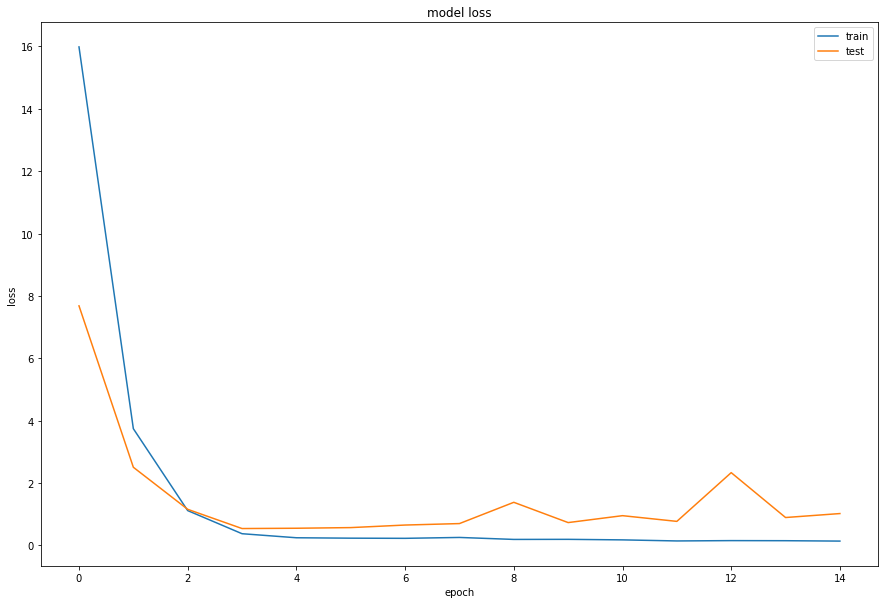

{'loss': [15.985809326171875, 3.7407338619232178, 1.113896131515503, 0.3722906708717346, 0.2425348311662674, 0.2292284071445465, 0.2242201715707779, 0.2527528405189514, 0.18927565217018127, 0.19175171852111816, 0.17470967769622803, 0.14031736552715302, 0.1509639173746109, 0.14806275069713593, 0.13568198680877686], 'accuracy': [0.7181388735771179, 0.799833357334137, 0.831861138343811, 0.8801388740539551, 0.9060555696487427, 0.9116389155387878, 0.913611114025116, 0.909166693687439, 0.929611086845398, 0.9302777647972107, 0.9369999766349792, 0.9490833282470703, 0.948972225189209, 0.9536666870117188, 0.957361102104187], 'val_loss': [7.680453777313232, 2.5036609172821045, 1.1545844078063965, 0.5380791425704956, 0.547701895236969, 0.5683826208114624, 0.6503812670707703, 0.6973878741264343, 1.3796286582946777, 0.7293132543563843, 0.9510422945022583, 0.7680341601371765, 2.3309824466705322, 0.891659140586853, 1.018862247467041], 'val_accuracy': [0.7151111364364624, 0.7702222466468811, 0.80244445

In [ ]:
#main3_1()
model3_1 = gen_sequential_model3_1()
history = fit_model(model3_1, train_data, test_data)
plot_loss_curve(history.history)
print(history.history)
print("train loss = ", history.history['loss'][-1])
print("validation loss = ", history.history['val_loss'][-1])


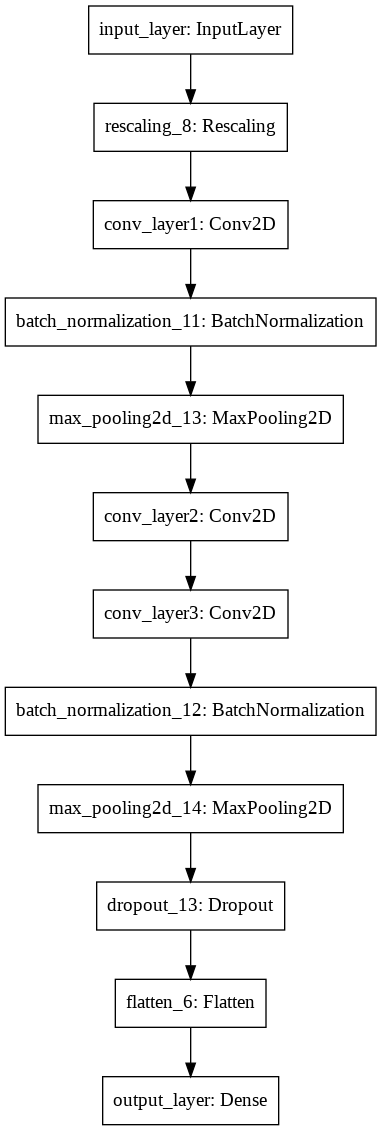

In [ ]:
plot_model(model3_1)

In [34]:
#keras NN으로 model3_2을 생성하는 함수 작성
def gen_sequential_model3_2():
    model = Sequential([Input(shape = (300, 300, 3), name = 'input_layer'), 
                        Rescaling(1.0/255),
                        Conv2D(64, kernel_size = 3,  padding = "same", activation = 'relu', name = 'conv_layer1'),
                        BatchNormalization(),
                        MaxPooling2D(pool_size = 2),
                        Conv2D(128, kernel_size = 3,  padding = "same", activation = 'relu', name = 'conv_layer2'),
                        Conv2D(256, kernel_size = 3,  padding = "same", activation = 'relu', name = 'conv_layer3'),
                        BatchNormalization(),
                        MaxPooling2D(pool_size = 2),
                        Dropout(0.4),
                        GlobalAveragePooling2D(),
                        Dense(64, activation = 'relu', name = 'fc_layer1'),
                        Dense(8, activation = 'relu', name = 'fc_layer2'),
                        Flatten(),
                        Dense(3, activation = 'softmax', name = 'output_layer')])
    
    model.summary()
    
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 300, 300, 3)       0         
_________________________________________________________________
conv_layer1 (Conv2D)         (None, 300, 300, 64)      1792      
_________________________________________________________________
batch_normalization_2 (Batch (None, 300, 300, 64)      256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 150, 150, 64)      0         
_________________________________________________________________
conv_layer2 (Conv2D)         (None, 150, 150, 128)     73856     
_________________________________________________________________
conv_layer3 (Conv2D)         (None, 150, 150, 256)     295168    
_________________________________________________________________
batch_normalization_3 (Batch (None, 150, 150, 256)    

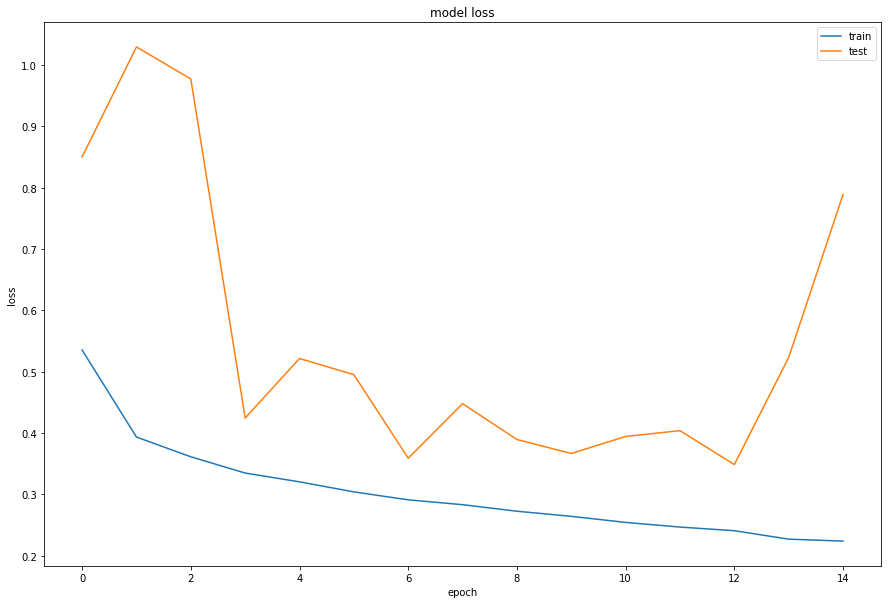

{'loss': [0.5351027846336365, 0.39328116178512573, 0.36111944913864136, 0.3346115052700043, 0.32027631998062134, 0.3039088845252991, 0.290937215089798, 0.2830476760864258, 0.272382527589798, 0.26406705379486084, 0.2541508674621582, 0.24656140804290771, 0.24062614142894745, 0.22685576975345612, 0.22370170056819916], 'accuracy': [0.7718611359596252, 0.8478333353996277, 0.8613888621330261, 0.8711944222450256, 0.8788055777549744, 0.8837500214576721, 0.89041668176651, 0.8934999704360962, 0.8975555300712585, 0.8999999761581421, 0.9045555591583252, 0.9079444408416748, 0.9114999771118164, 0.9146111011505127, 0.9161944389343262], 'val_loss': [0.8500639796257019, 1.0292682647705078, 0.9769518375396729, 0.4243181049823761, 0.5213400721549988, 0.4950268566608429, 0.35878080129623413, 0.44768786430358887, 0.38929319381713867, 0.36649417877197266, 0.3942570388317108, 0.4037410020828247, 0.34844866394996643, 0.5229719877243042, 0.7887223958969116], 'val_accuracy': [0.605222225189209, 0.69977778196334

In [35]:
#main3_2()
model3_2 = gen_sequential_model3_2()
history = fit_model(model3_2, train_data, test_data)
plot_loss_curve(history.history)
print(history.history)
print("train loss = ", history.history['loss'][-1])
print("validation loss = ", history.history['val_loss'][-1])
  

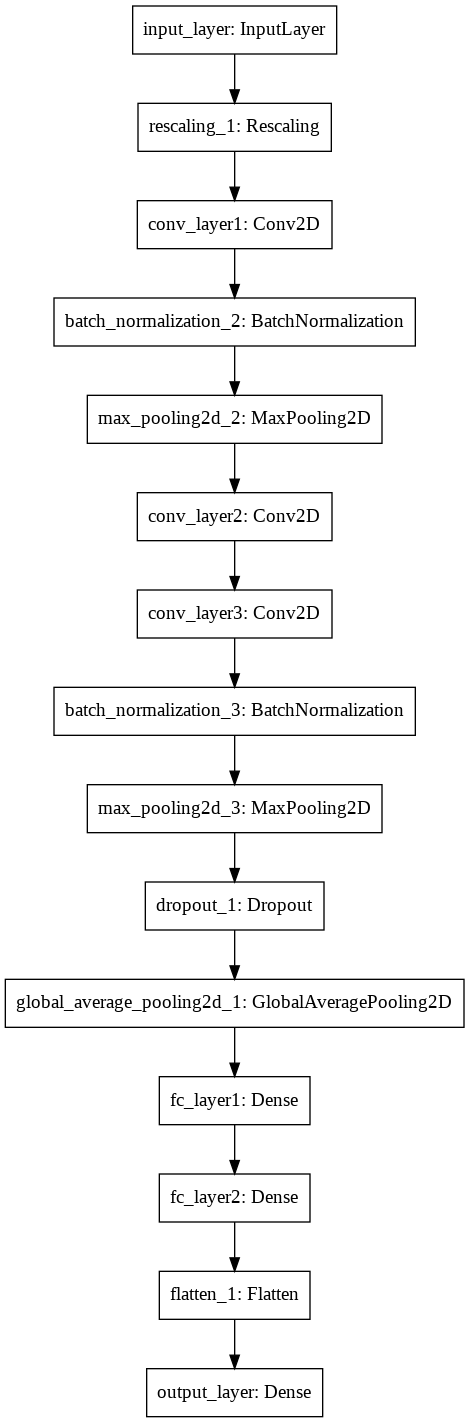

In [36]:
plot_model(model3_2)

In [ ]:
#keras NN으로 model3_3을 생성하는 함수 작성
def gen_sequential_model3_3():
    model = Sequential([Input(shape = (300, 300, 3), name = 'input_layer'), 
                        Rescaling(1.0/255),
                        Conv2D(64, kernel_size = 3,  padding = "same", activation = 'relu', name = 'conv_layer1'),
                        BatchNormalization(),
                        MaxPooling2D(pool_size = 2),
                        Conv2D(128, kernel_size = 3,  padding = "same", activation = 'relu', name = 'conv_layer2'),
                        Conv2D(256, kernel_size = 3,  padding = "same", activation = 'relu', name = 'conv_layer3'),
                        BatchNormalization(),
                        MaxPooling2D(pool_size = 2),
                        Dropout(0.4),
                        GlobalAveragePooling2D(),
                        Dense(256, activation = 'relu', name = 'fc_layer1'),
                        Dense(64, activation = 'relu', name = 'fc_layer2'),
                        Dense(8, activation = 'relu', name = 'fc_layer3'),
                        Flatten(),
                        Dense(3, activation = 'softmax', name = 'output_layer')])
    
    model.summary()
    
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_11 (Rescaling)     (None, 300, 300, 3)       0         
_________________________________________________________________
conv_layer1 (Conv2D)         (None, 300, 300, 64)      1792      
_________________________________________________________________
batch_normalization_17 (Batc (None, 300, 300, 64)      256       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 150, 150, 64)      0         
_________________________________________________________________
conv_layer2 (Conv2D)         (None, 150, 150, 128)     73856     
_________________________________________________________________
conv_layer3 (Conv2D)         (None, 150, 150, 256)     295168    
_________________________________________________________________
batch_normalization_18 (Batc (None, 150, 150, 256)   

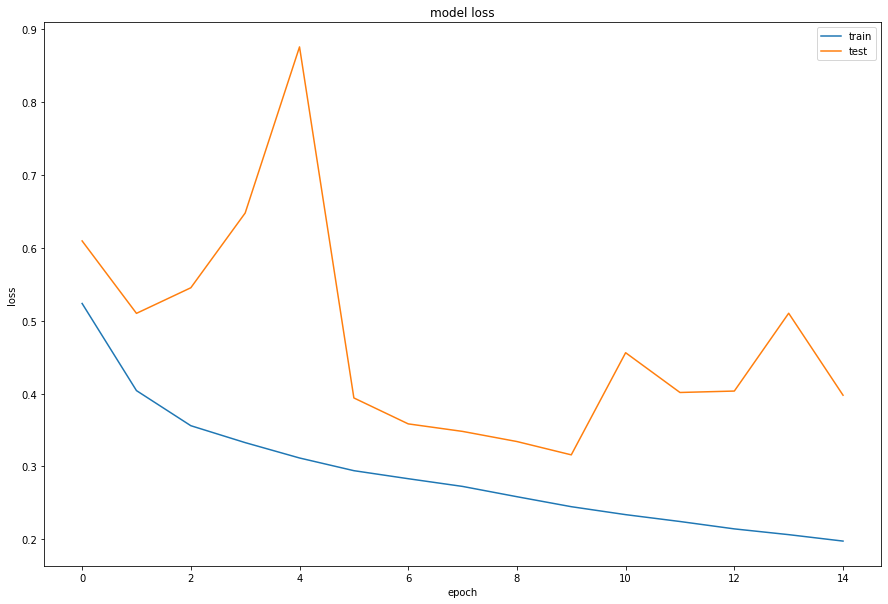

{'loss': [0.5236549973487854, 0.4040401875972748, 0.35586509108543396, 0.3326481878757477, 0.3115493357181549, 0.294132798910141, 0.28310084342956543, 0.2725081145763397, 0.2583911716938019, 0.24468763172626495, 0.2337724268436432, 0.22435441613197327, 0.21421076357364655, 0.20630590617656708, 0.19746264815330505], 'accuracy': [0.7817222476005554, 0.8429166674613953, 0.8644166588783264, 0.873805582523346, 0.8824166655540466, 0.8906388878822327, 0.8931944370269775, 0.8975555300712585, 0.9030555486679077, 0.9083889126777649, 0.9124166369438171, 0.9163610935211182, 0.9195277690887451, 0.9216111302375793, 0.9254999756813049], 'val_loss': [0.6095328330993652, 0.5100916624069214, 0.5452253818511963, 0.6478307843208313, 0.8758664131164551, 0.39397725462913513, 0.35837650299072266, 0.34803906083106995, 0.33412864804267883, 0.31584998965263367, 0.45605963468551636, 0.40146997570991516, 0.4034265875816345, 0.5102499723434448, 0.39771994948387146], 'val_accuracy': [0.7493333220481873, 0.770333349

In [61]:
#main3_3()
model3_3 = gen_sequential_model3_3()
history = fit_model(model3_3, train_data, test_data)
plot_loss_curve(history.history)
print(history.history)
print("train loss = ", history.history['loss'][-1])
print("validation loss = ", history.history['val_loss'][-1])
  

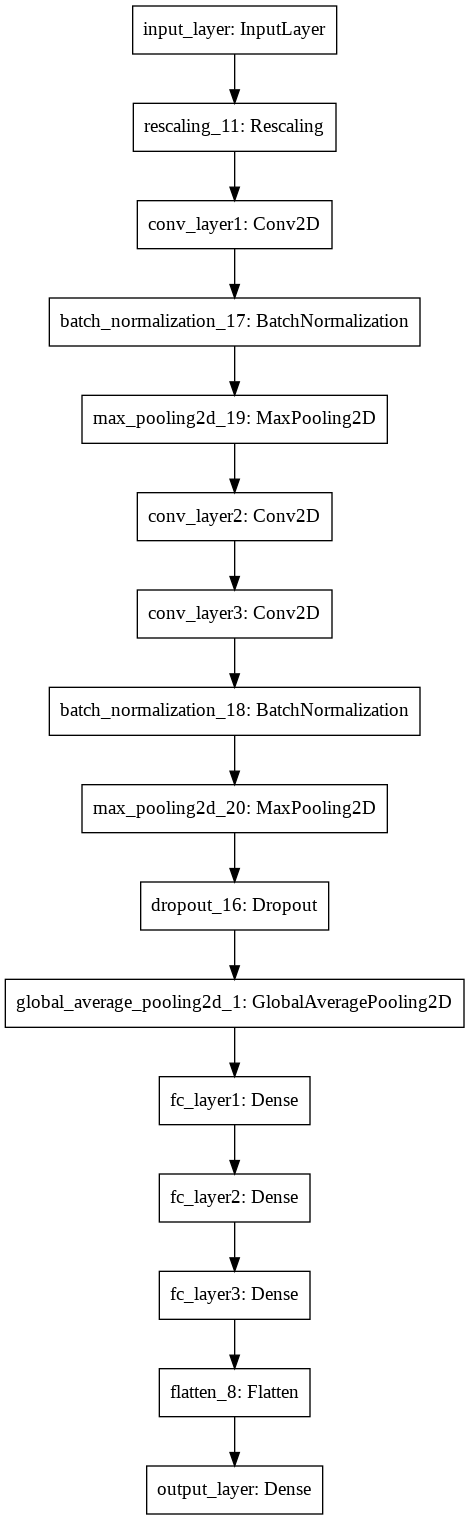

In [62]:
plot_model(model3_3)

In [53]:
#keras NN으로 model4을 생성하는 함수 작성
def gen_sequential_model4():
    model = Sequential([Input(shape = (300, 300, 3), name = 'input_layer'), 
                        Rescaling(1.0/255),
                        Conv2D(64, kernel_size = 3,  padding = "same", activation = 'relu', name = 'conv_layer1'),
                        Conv2D(128, kernel_size = 3,  padding = "same", activation = 'relu', name = 'conv_layer2'),
                        BatchNormalization(),
                        MaxPooling2D(pool_size = 2),
                        Dropout(0.4),
                        Conv2D(256, kernel_size = 3,  padding = "same", activation = 'relu', name = 'conv_layer3'),
                        Conv2D(256, kernel_size = 3,  padding = "same", activation = 'relu', name = 'conv_layer4'),
                        BatchNormalization(),
                        MaxPooling2D(pool_size = 2),
                        Dropout(0.4),
                        Flatten(),
                        Dense(3, activation = 'softmax', name = 'output_layer')])
    
    model.summary()
    
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [83]:
#main4()
model4 = gen_sequential_model4()
history = fit_model(model4, train_data, test_data)
plot_loss_curve(history.history)
print(history.history)
print("train loss = ", history.history['loss'][-1])
print("validation loss = ", history.history['val_loss'][-1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 300, 300, 3)       0         
_________________________________________________________________
conv_layer1 (Conv2D)         (None, 300, 300, 64)      1792      
_________________________________________________________________
conv_layer2 (Conv2D)         (None, 300, 300, 128)     73856     
_________________________________________________________________
batch_normalization_6 (Batch (None, 300, 300, 128)     512       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 150, 150, 128)     0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 150, 150, 128)     0         
_________________________________________________________________
conv_layer3 (Conv2D)         (None, 150, 150, 256)    

KeyboardInterrupt: ignored

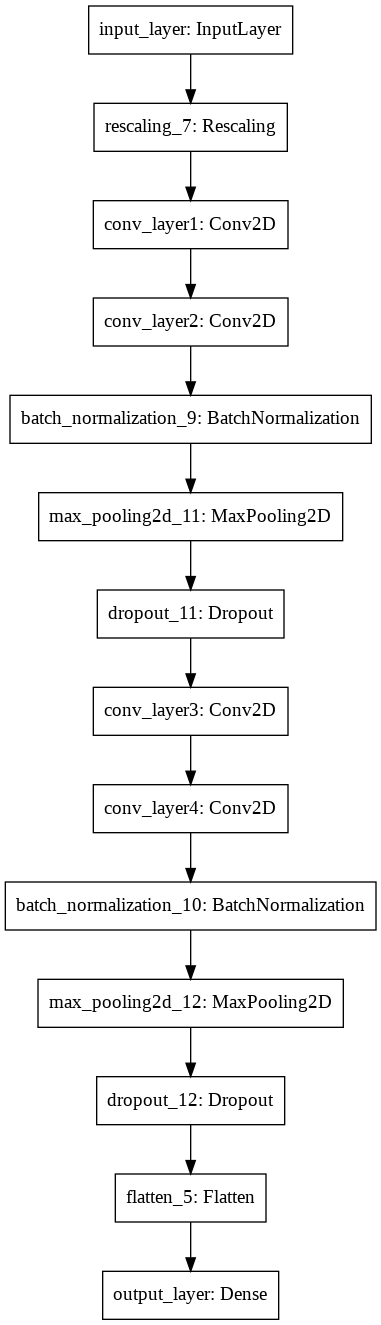

In [ ]:
plot_model(model4)

In [37]:
model3_2.save('model-201611279')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-201611279/assets


<true sample>
y_actual =  [0. 0. 1.]
actual class :  exterior
y_pred =  [[1.6964209e-04 4.8029143e-01 5.1953894e-01]]
predicted class :  exterior


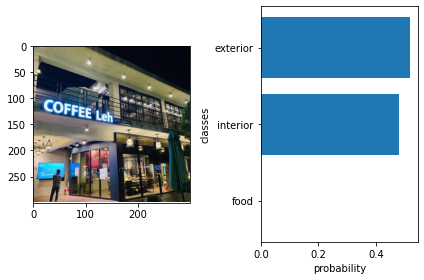

<true sample>
y_actual =  [0. 1. 0.]
actual class :  interior
y_pred =  [[7.7541335e-04 9.9308878e-01 6.1358064e-03]]
predicted class :  interior


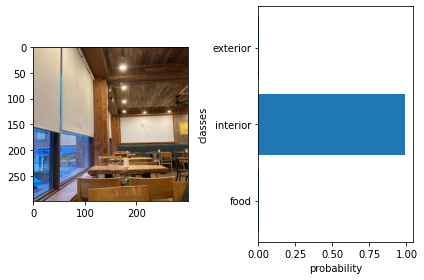

<false sample>
y_actual =  [1. 0. 0.]
actual class :  food
y_pred =  [[0.14711484 0.31291074 0.53997445]]
predicted class :  exterior


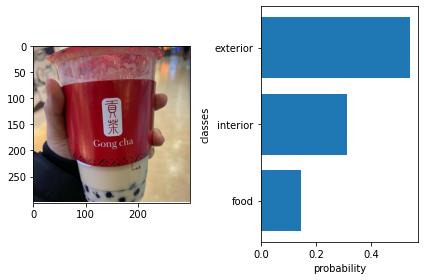

<false sample>
y_actual =  [1. 0. 0.]
actual class :  food
y_pred =  [[0.18644539 0.7406817  0.0728728 ]]
predicted class :  interior


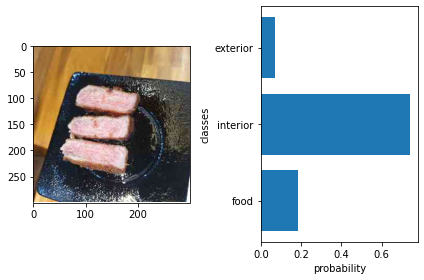

In [84]:
#model3_2 prediction 시연
predict_image_sample(model3_2, test_data)

In [77]:
!pip install sklearn

In [81]:
#test data 자체 성능
def performance_test_data(model, test_data):
  Y_ACTUAL = []
  Y_PRED = []
  from sklearn.metrics import classification_report
  classes = ['food', 'interior', 'exterior']
  for i in range(int(9000/32)+1):
    test_image_batch = test_data[i][0]
    y_actual_batch = test_data[i][1]
    for j in range(len(test_image_batch)):
      test_image = test_image_batch[j]
      test_image_res = test_image.reshape(1,300,300,3)
      y_actual = y_actual_batch[j]
      y_pred = model.predict(test_image_res)
      y_pred_idx = np.argmax(y_pred, axis=1)[0]
        
      for k in range(len(classes)):
          if y_actual[k] == 1:
            Y_ACTUAL.append(classes[k])
      Y_PRED.append(classes[y_pred_idx])

  print(classification_report(Y_ACTUAL, Y_PRED, target_names=classes)) 

In [82]:
performance_test_data(model3_2, test_data)

              precision    recall  f1-score   support

        food       0.63      0.83      0.72      2000
    interior       0.99      0.58      0.73      4000
    exterior       0.58      0.78      0.66      3000

    accuracy                           0.70      9000
   macro avg       0.73      0.73      0.70      9000
weighted avg       0.77      0.70      0.70      9000

